# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Import libraries
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import shutil
from collections import Counter
import numpy as np 
import random
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

In [2]:
# Download the German Traffic Signs Dataset
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
!wget https://github.com/DavidAbdelmalek/Self_Driving_Car_ND/blob/main/CarND-Traffic-Sign-Classifier-Project/signnames.csv

--2021-11-11 10:02:51--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 54.192.19.158, 54.192.19.95, 54.192.19.11, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|54.192.19.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M   153MB/s    in 0.8s    

2021-11-11 10:02:52 (153 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

--2021-11-11 10:02:52--  https://github.com/DavidAbdelmalek/Self_Driving_Car_ND/blob/main/CarND-Traffic-Sign-Classifier-Project/signnames.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html

In [3]:
!unzip traffic-signs-data.zip

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


In [4]:
# Moving the data files to directory
!mkdir data
for i in os.listdir():
  if '.p' in i:
    shutil.move('./'+i,'./data')

try:
  shutil.move('./signnames.csv','./data')
except:
  print('No CSV file was found')

In [2]:
# Fill this in based on where you saved the training and testing data
training_file = './data/train.p'
validation_file='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


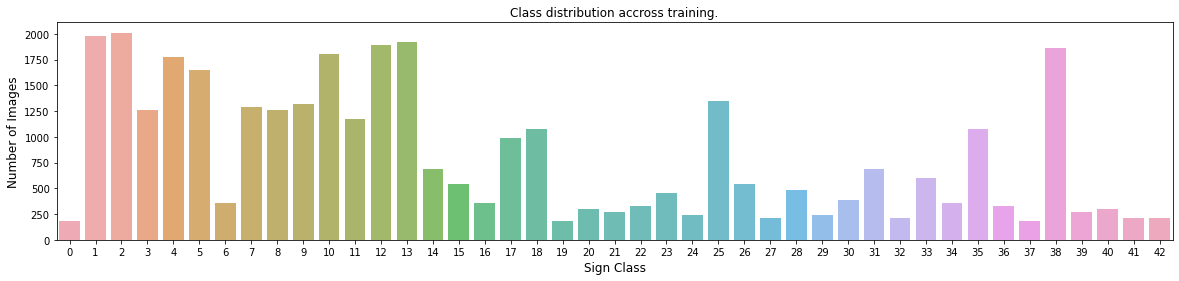

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


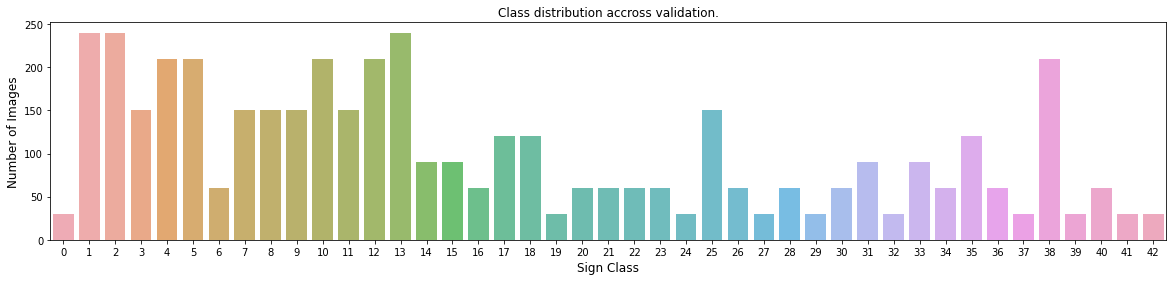

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


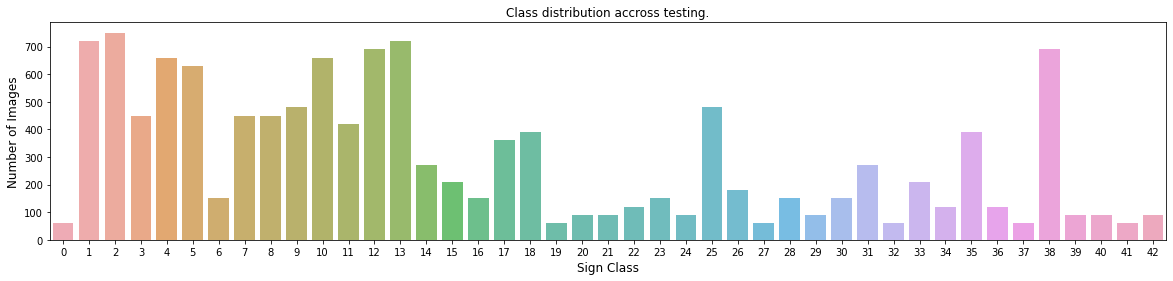

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

def display_freq(imgs,labels,target):
  """
    Display frequency of each classs in target dataset.

    Arguments:
        - images [numpy.ndarray]: batch of RGB images with shape (batch_size, 32, 32, 3)
        - labels [numpy.ndarray]: Image corresponding feature/label
        - target [string]: target dataset to display its frequency.
  """

  # Count the frequency of labels in training dataset
  labels_freq = dict(Counter(labels))
  label_count_df = pd.DataFrame(labels_freq.items(),columns= ['img_id','count'])

  plt.figure(figsize=(20,4))
  sns.barplot(label_count_df['img_id'].values, label_count_df['count'].values, alpha=0.8, )
  plt.xlabel('Sign Class', fontsize=12)
  plt.ylabel('Number of Images', fontsize=12)
  plt.title(f'Class distribution accross {target}.')
  plt.show()

# Diplsay class distribution accross train,valid,and test datasets
display_freq(X_train,y_train,'training')
display_freq(X_valid,y_valid,'validation')
display_freq(X_test,y_test,'testing')


We can see that our dataset is very biased toward some classes. We will take a deeper look into the classes that are better represented and the classes that have very few training examples.

In [5]:
# Read sign names
sign_names = pd.read_csv('data/signnames.csv', error_bad_lines=False)

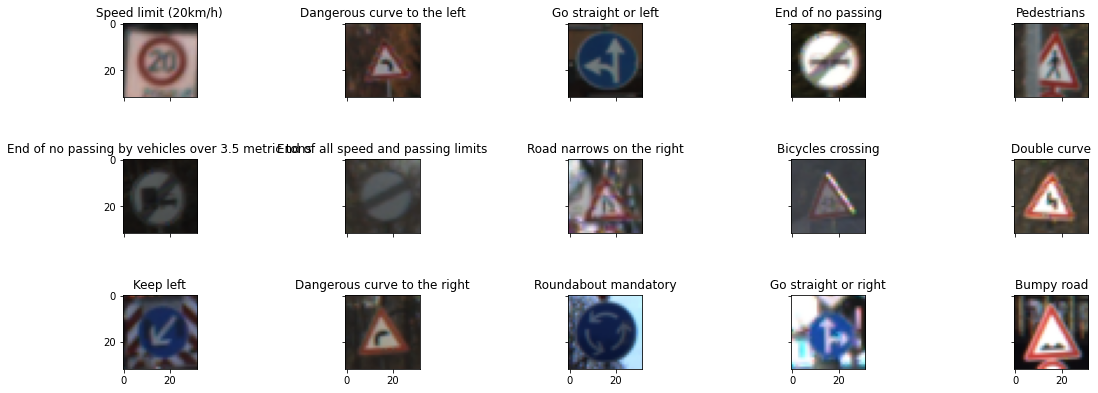

In [6]:
# Select 15 labels that have the fewest frequency.
label_count_df = pd.DataFrame(dict(Counter(y_train)).items(),columns= ['img_id','count'])
bottom15 = label_count_df.sort_values(by=['count'])[:15]['img_id']

fig, ax = plt.subplots(nrows = 3 ,ncols = 5, figsize=(15,6),sharex=True,sharey=True)
fig.subplots_adjust(hspace = 1, wspace=.5)
axs = ax.ravel()

random.seed(2020)

i =0 
for img_id in bottom15:
  count = label_count_df[label_count_df['img_id']==img_id]['count'].values[0]
  random_indx =random.randrange(count)
  axs[i].imshow(X_train[y_train == img_id][random_indx])
  sign_name = sign_names[sign_names['ClassId']==img_id]['SignName'].values[0]

  axs[i].set_title(f"{sign_name}")
  i += 1

plt.tight_layout()
plt.show() 

We can see that the quality of the images are very different one from another. In addition, most of classes have a huge varaint in their frequency. This discrepancy will certainly impact our model if we are not careful with the pre-processing of these images.

On [1] the winners of the GTSRB challenge addressed this problem by normalizing the contrast during preprocessing.

On [2] the authors introduced more samples to the training dataset by applying translations, scaling and rotations during preprocessing and proposed data augmentation to generate enough new instances to ensure each category has at least 200 instances.

We will follow their award winning approach to preprocessing before moving on to our model architecture.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


**Preprocessing steps**

My dataset preprocessing consisted of:

1.   Converting to grayscale - This worked well for Sermanet and LeCun as described in their traffic sign classification article. It also helps to reduce training time, which was nice when a GPU wasn't available.

2.   Normalizing the data to the range (-1,1) - This was done using the line of code X_train_normalized = (X_train - 128)/128. The resulting dataset mean wasn't exactly zero.

In [7]:
def rgb_to_gray(images):
  """
  Convert batch of RGB images to grayscale
    Take the average of R, G, B values and insert it into 1 channel

    Arguments:
        - images [numpy.ndarray]: batch of RGB images with shape (batch_size, 32, 32, 3)

    Returns:
        - gray_imgs [numpy.ndarray]: batch of gray images with shape (batch_size, 32, 32, 1)
  """
  gray_imgs = np.mean(images, axis=3)
  gray_imgs = np.expand_dims(gray_imgs, axis=3)
  return gray_imgs

In [8]:
# Convert images to grayscale.
gray_X_train = rgb_to_gray(X_train)
gray_X_valid = rgb_to_gray(X_valid)
gray_X_test = rgb_to_gray(X_test)

# Normalize grayscale images to be in range(0,1) values.
#normalized_X_train = (gray_X_train - 128.) / 128.
#normalized_X_valid = (gray_X_valid - 128.) / 128.
#normalized_X_test  = (gray_X_test  - 128.) / 128.


normalized_X_train = X_train/255.
normalized_X_valid = X_valid/255.
normalized_X_test  = X_test/255.


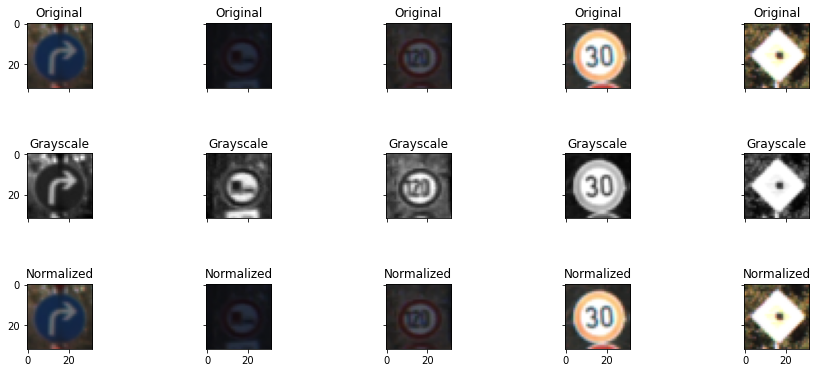

In [9]:
# Compare random 5 images between RGB and grayscale
fig, ax = plt.subplots(nrows = 3 ,ncols = 5, figsize=(15,6),sharex=True,sharey=True)
fig.subplots_adjust(hspace = 1, wspace=.5)

# set seed
random.seed(2021)

for i in range(5):
  random_indx =random.randrange(n_train)
  ax[0, i].set_title("Original")
  ax[0, i].imshow(X_train[random_indx])
  
  ax[1, i].set_title("Grayscale")
  ax[1, i].imshow(gray_X_train[random_indx].squeeze(), cmap='gray')

  #ax[2, i].set_title("Normalized")
  #ax[2, i].imshow(normalized_X_train[random_indx].squeeze(), cmap='gray')

  ax[2, i].set_title("Normalized")
  ax[2, i].imshow(normalized_X_train[random_indx].squeeze())
  


### Data Augmentation

For this part I created a function that will randomly rotate, scale and translate our images with the same parameters as implemented in [2] which are
- Rotation between -15 and 15 degrees
- Translation between -2 and 2 pixels
- Random Brightness

In addition, we make sure that each label class has at least 800 images.

In [43]:
def random_brightness(img):
  """
	Change the brightness of image for data augmentation
	Arguments:
		- image [numpy.ndarray]: Input image		
	Returns:
		- Transformed image as an np.array() object
	"""
  
  shifted = img + 1.0   # shift to (0,2) range
  img_max_value = max(shifted.flatten())
  max_coef = 2.0/img_max_value
  min_coef = max_coef - 0.1
  coef = np.random.uniform(min_coef, max_coef)
  dst = shifted * coef - 1.0
  return dst

def rotate_img(img,angle):
  """
	Rotate the image for data augmentation
	
	Arguments:
		- image [numpy.ndarray]: Input image
		- angle (int): Max rotation angle, in degrees. Direction of rotation is random.		
	Returns:
		- Transformed image as an np.array() object
	"""
  print(angle)
  h, w = img.shape[:2]
  center = (h//2,w//2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
  return rotated_img

def translate_img(imge,translation):
  """
	Translate the image for data augmentation
	
	Arguments:
		- image [numpy.ndarray]:  Input image
		- translation (float): Max translation amount in both x and y directions,
			expressed as fraction of total image width/height
		
	Returns:
		- Transformed image as an np.array() object
	"""
  h, w = img.shape[:2]
  x_offset = translation * w * np.random.uniform(-1, 1)
  y_offset = translation * h * np.random.uniform(-1, 1)
  print(x_offset,y_offset)
  translation_mat = np.float32([[1, 0, x_offset], [0, 1, y_offset]])
  image = cv2.warpAffine(imge, translation_mat, (w, h))
  return img


In [44]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst
    

15
309.47014468191065 -112.67465712856848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15


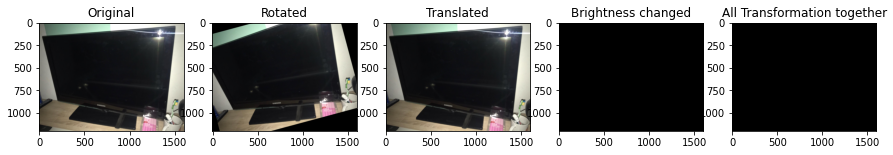

In [51]:
# Display random image augmentation
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(15, 8))
from PIL import Image

#idx =random.randrange(count)
#img = normalized_X_train[idx]
image = Image.open("temp.JPG")
img = np. array(image)

ax1.set_title('Original')
ax1.imshow(img.squeeze(),cmap='gray')
ax2.set_title('Rotated')
rotated_img = rotate_img(img,15)
ax2.imshow(rotated_img.squeeze(),cmap='gray')
ax3.set_title('Translated')
translated= translate_img(img,0.2)
ax3.imshow(translated.squeeze(),cmap='gray')
ax4.set_title('Brightness changed')
brightness_changed= random_brightness(img)
ax4.imshow(brightness_changed.squeeze(),cmap='gray')

ax5.set_title('All Transformation together')
#transformed = rotate_img(translate_img(random_brightness(img),0.3),15)
transformed = rotate_img(random_brightness(img),15)
#transformed = random_scaling(img)
ax5.imshow(transformed.squeeze(),cmap='gray')

In [19]:
# Data Augmentation pipeline.
def transform_img(img,angle,translation):
  """
	Transform the image for data augmentation
	
	Arguments:
		- image: Input image
		- angle: Max rotation angle, in degrees. Direction of rotation is random.
		- translation: Max translation amount in both x and y directions,
			expressed as fraction of total image width/height
		
	Returns:
		- Transformed image as an np.array() object
	"""

  # Adjust birghtness
  image = random_brightness(img)
  # Rotate
  image = rotate_img(image,angle)
  # Translate
  image = translate_img(image,translation)

  return image
  

def data_aug(images, features, output_file, num_images, angle, translation):
  """
	Data augmentation for input images
	
	Arguments:
		- images [numpy.ndarray]: Input images
    - features [numpy.ndarray]: Image feature/label
		- output_file (string): name of file that output data will be saved at.
		- num_images (int): Number of images that will be added through
    data augmentation pipeline.
    - angle: Max rotation angle, in degrees. Direction of rotation is random.
		- translation: Max translation amount in both x and y directions,
			expressed as fraction of total image width/height
		
	Returns:
		-  Transformed image as an np.array() object
  """
  if output_file in os.listdir():
    print(f'Data Augmentation has already been done before. Please read {output_file}')
    return 
  
  # count frequency of each class
  label_freq = dict(Counter(features))
  # set random seed
  random.seed(2021)

  for label, freq in label_freq.items():
    if freq < num_images :
      augmented_needed = num_images - freq
      sign_name = sign_names[sign_names['ClassId']==label]['SignName'].values[0]
      print(f'\'{sign_name}\' sign has only {freq} image. {augmented_needed} augmentated images will be added')
      print('-'*100)

      # array of added augmented images
      added = []
      added_y = np.full( shape=augmented_needed, fill_value=label,dtype=np.int )
      
      for i in range(augmented_needed):
        # randomly select img from selected class
        idx = np.random.choice(images[features == label].shape[0], 1, replace=False)
        img = images[label]
          
        # call transformation pipeline
        aug_img = transform_img(img.squeeze(),angle,translation)
        added.append(aug_img)

      # update dataset
      images = np.concatenate((images, np.array(added)), axis=0)
      features = np.concatenate((features, added_y), axis=0)

  # Create dict of new data, and write it to disk via pickle file
  new_data = {'features': images, 
              'labels': features}
  with open('data_aug.p', mode='wb') as f:
    pickle.dump(new_data, f)


In [38]:
# Data Augmentation
data_aug(normalized_X_train,y_train, 'data_aug.p', 200 ,15,0.2 )

# Read data augmented file
with open('data_aug.p', mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = shuffle(train['features'], train['labels'])


TypeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


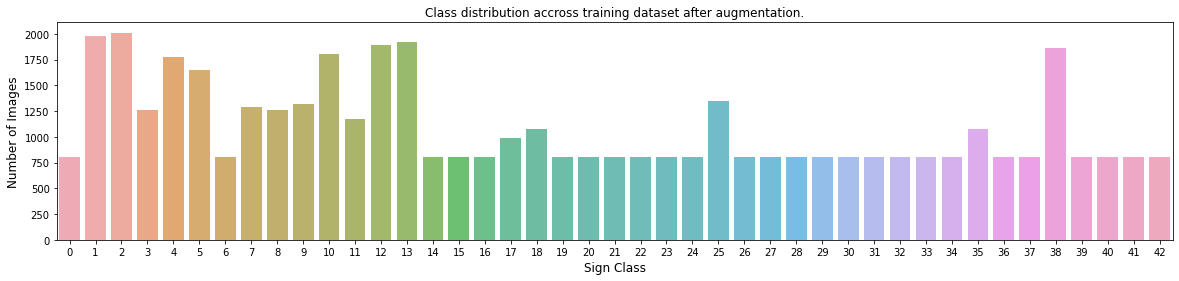

In [22]:
display_freq(X_train,y_train,'training dataset after augmentation')

In [25]:
print(f'{X_train.shape[0]} images are in training data after augmentation')

46480 images are in training data after augmentation


## Model Architecture

In [26]:
# One-hot-encoding 
y_train = tf.keras.utils.to_categorical(y_train,n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid,n_classes)
y_test  = tf.keras.utils.to_categorical(y_test,n_classes)


### LeNet-5 implementation

![LeNet](https://github.com/jeremy-shannon/CarND-LeNet-Lab/raw/cd4ba97906176e6020a4b3c084b7518ef3dded5e/lenet.png)

In [27]:
def LeNet(x,n_classes,drop_prop,lr):
  tf.random.set_seed(0) 

  # create model
  model = tf.keras.Sequential()
  
  # Convolution filter #1: Convolutional. Input = 32x32x1. Output = 28x28x6.
  model.add(tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   input_shape =  x.shape[1:],
                                   name = 'layer1'
                                   ))

  # Subsampling #1 : Input =  28x28x6. Output = 14x14x6.
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_1'))

  # Convolution filter #2: Convolutional. Input =  14x14x6. Output = 10x10x16.
  model.add(tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   name='layer2'
                                   ))

  # Subsampling #2 : Input =  10x10x16. Output = 5x5x16.
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_2'))

  # flatten to feed classifier network linear network of neuorns.
  model.add(tf.keras.layers.Flatten())

  # Fully Connected #1 : Input =  5x5x16. Output = 120.
  model.add(tf.keras.layers.Dense(units=120,activation='relu',name='fully_connected-1'))
  
  # Dropout layer
  model.add(tf.keras.layers.Dropout(drop_prop))

  # Fully Connected #2 : Input =  120. Output = 84.
  model.add(layers.Dense(units=84, activation='relu',name='fully_connected-2'))

  # Dropout layer
  model.add(tf.keras.layers.Dropout(drop_prop))

  # Output layer : Input =  5x5x16. Output = 120.
  model.add(layers.Dense(units=n_classes, activation = 'softmax',name='output'))

  # Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

  return model

In [28]:
# Model hyperparameters
DROUPOUT = 0.2
LEARNING_RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 128

# Build the model
model = LeNet(X_train,n_classes,DROUPOUT,LEARNING_RATE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 subsampling_1 (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 layer2 (Conv2D)             (None, 10, 10, 16)        2416      
                                                                 
 subsampling_2 (MaxPooling2D  (None, 5, 5, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 fully_connected-1 (Dense)   (None, 120)               4

In [30]:
# Fit the model
history = model.fit(X_train,y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(normalized_X_valid, y_valid),
                 verbose= 1)

Epoch 1/25
364/364 [==============================] - 4s 10ms/step - loss: 2.5525 - accuracy: 0.3063 - val_loss: 1.1531 - val_accuracy: 0.6413
Epoch 2/25
364/364 [==============================] - 3s 9ms/step - loss: 1.4927 - accuracy: 0.5611 - val_loss: 0.6598 - val_accuracy: 0.8141
Epoch 3/25
364/364 [==============================] - 3s 9ms/step - loss: 1.2454 - accuracy: 0.6348 - val_loss: 0.4954 - val_accuracy: 0.8615
Epoch 4/25
364/364 [==============================] - 3s 9ms/step - loss: 1.1336 - accuracy: 0.6693 - val_loss: 0.4550 - val_accuracy: 0.8687
Epoch 5/25
364/364 [==============================] - 4s 12ms/step - loss: 1.0625 - accuracy: 0.6880 - val_loss: 0.3876 - val_accuracy: 0.8939
Epoch 6/25
364/364 [==============================] - 4s 11ms/step - loss: 1.0187 - accuracy: 0.7001 - val_loss: 0.3486 - val_accuracy: 0.9034
Epoch 7/25
364/364 [==============================] - 4s 11ms/step - loss: 0.9855 - accuracy: 0.7111 - val_loss: 0.3540 - val_accuracy: 0.9122
Ep

In [31]:
# Test model
loss,acc = model.evaluate(normalized_X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)

395/395 [==============================] - 2s 5ms/step - loss: 0.5711 - accuracy: 0.9199
Test loss: 0.5710762143135071
Test accuracy: 0.9198732972145081


As we can see that LeNet from [1] does not preform well on traffic sign classification so below you can find my implemented network.

### My Architecture 

In [32]:
def myNet(x,n_classes,drop_prop,lr):
  tf.random.set_seed(0) 

  # create model
  model = tf.keras.Sequential()
  
  # Convolution filter #1: Convolutional. Input = 32x32x1. Output = 28x28x6.
  model.add(tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   input_shape =  x.shape[1:],
                                   name = 'layer1'
                                   ))

  # Subsampling #1 : Input =  28x28x6. Output = 14x14x6.
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_1'))

  # Convolution filter #2: Convolutional. Input =  14x14x6. Output = 10x10x16.
  model.add(tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   name='layer2'
                                   ))

  # Subsampling #2 : Input =  10x10x16. Output = 5x5x16.
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_2'))

  # flatten to feed classifier network linear network of neuorns.
  model.add(tf.keras.layers.Flatten())

  # Fully Connected #1 : Input =  5x5x16. Output = 120.
  model.add(tf.keras.layers.Dense(units=120,activation='relu',name='fully_connected-1'))
  
  # Dropout layer
  model.add(tf.keras.layers.Dropout(drop_prop))

  # Fully Connected #2 : Input =  120. Output = 84.
  model.add(layers.Dense(units=84, activation='relu',name='fully_connected-2'))

  # Dropout layer
  model.add(tf.keras.layers.Dropout(drop_prop))

  # Output layer : Input =  5x5x16. Output = 120.
  model.add(layers.Dense(units=n_classes, activation = 'softmax',name='output'))

  # Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

  return model

In [33]:
# Model hyperparameters
DROUPOUT = 0.5
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 128

# Build the model
model = myNet(X_train,n_classes,DROUPOUT,LEARNING_RATE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 subsampling_1 (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 layer2 (Conv2D)             (None, 10, 10, 16)        2416      
                                                                 
 subsampling_2 (MaxPooling2D  (None, 5, 5, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 fully_connected-1 (Dense)   (None, 120)              

In [34]:
# Fit the model
history = model.fit(X_train,y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(normalized_X_valid, y_valid),
                 verbose= 1)

Epoch 1/25
364/364 [==============================] - 4s 10ms/step - loss: 2.9099 - accuracy: 0.2184 - val_loss: 1.5059 - val_accuracy: 0.5823
Epoch 2/25
364/364 [==============================] - 3s 9ms/step - loss: 1.8995 - accuracy: 0.4350 - val_loss: 0.8966 - val_accuracy: 0.7626
Epoch 3/25
364/364 [==============================] - 3s 9ms/step - loss: 1.5789 - accuracy: 0.5270 - val_loss: 0.6529 - val_accuracy: 0.8170
Epoch 4/25
364/364 [==============================] - 3s 9ms/step - loss: 1.4182 - accuracy: 0.5782 - val_loss: 0.5160 - val_accuracy: 0.8680
Epoch 5/25
364/364 [==============================] - 3s 9ms/step - loss: 1.3142 - accuracy: 0.6055 - val_loss: 0.3993 - val_accuracy: 0.9073
Epoch 6/25
364/364 [==============================] - 4s 10ms/step - loss: 1.2498 - accuracy: 0.6278 - val_loss: 0.3452 - val_accuracy: 0.9127
Epoch 7/25
364/364 [==============================] - 3s 9ms/step - loss: 1.1881 - accuracy: 0.6475 - val_loss: 0.3231 - val_accuracy: 0.9272
Epoc

In [35]:
def myNet(inputs,drop_prop):
  inputs = keras.Input(shape=(32, 32, 3), name="img")
  
  
  # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
  x = tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   name = 'layer1'
                                   )(inputs)
  
  # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
  layer_1_output = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_1')(x)

    
  # TODO: Layer 2: Convolutional. Output = 10x10x16.
  x = tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   name = 'layer2'
                                   )(layer_1_output)

  # TODO: Pooling. Input = 10x10x16. Output = 14x14x6.
  layer_2_output = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2),name='subsampling_2')(x)

  # TODO: Layer 3: Convolutional. Output = 1x1x400.
  x = tf.keras.layers.Conv2D(filters = 400,
                                   kernel_size = (5,5),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu',
                                   name = 'layer3'
                                   )(layer_2_output)
  
  # TODO: Flatten. Input = 5x5x16. Output = 400.
  block_2_flat = tf.keras.layers.Flatten()(layer_2_output)
  #print("layer2flat shape:",layer2flat.get_shape())
    
  # Flatten x. Input = 1x1x400. Output = 400.
  x =  tf.keras.layers.Flatten()(x)

  # concatenate block_2 with block_3 
  x = tf.keras.layers.add([x, block_2_flat])

  # Dropout layer
  x = tf.keras.layers.Dropout(drop_prop)(x)

  # Fully Connected #2 : Input =  120. Output = 84.
  x = tf.keras.layers.Dense(units=800, activation='relu',name='fully_connected-1')(x)

  # Output layer : Input =  5x5x16. Output = 120.
  outputs = tf.keras.layers.Dense(units=n_classes, activation = 'softmax',name='output')(x)

  #
  model = keras.Model(inputs, outputs, name="myNet")

  return model
  
model = myNet(X_train,0.5)
model.summary()

Model: "myNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 layer1 (Conv2D)                (None, 28, 28, 6)    456         ['img[0][0]']                    
                                                                                                  
 subsampling_1 (MaxPooling2D)   (None, 14, 14, 6)    0           ['layer1[0][0]']                 
                                                                                                  
 layer2 (Conv2D)                (None, 10, 10, 16)   2416        ['subsampling_1[0][0]']          
                                                                                              

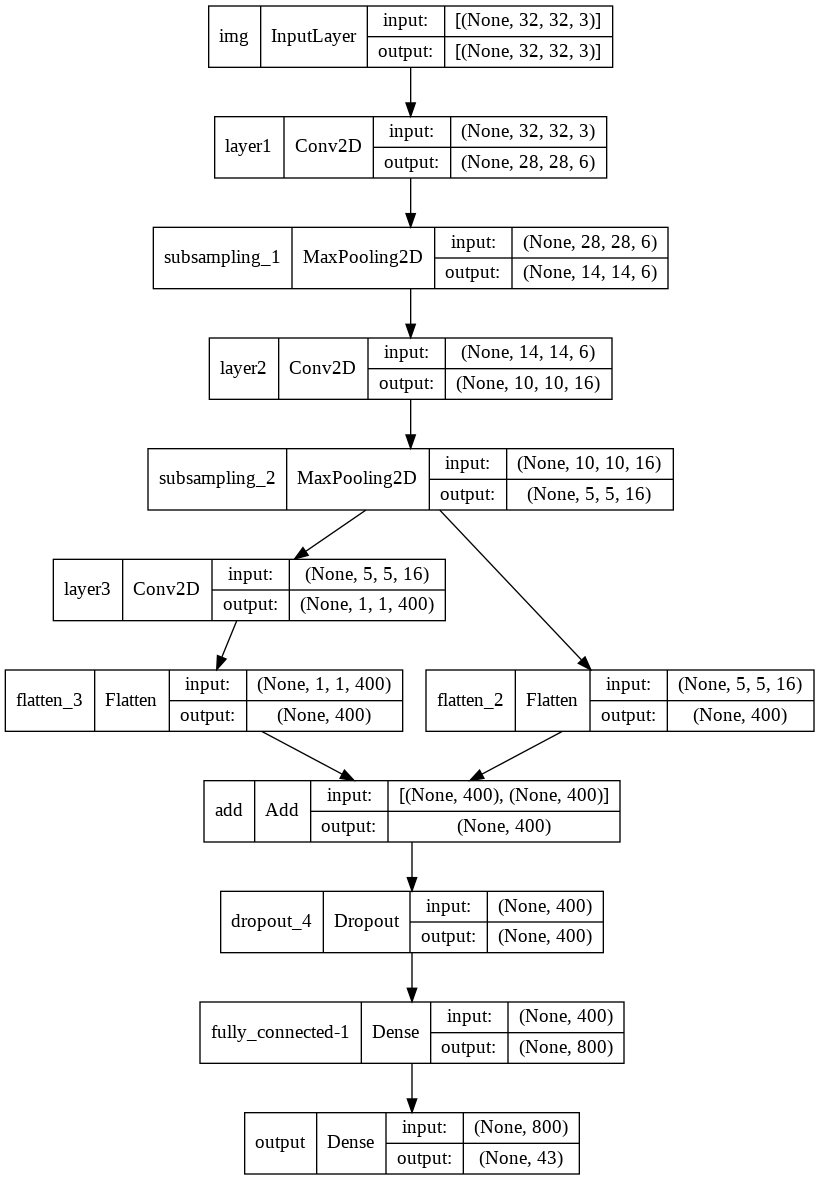

In [36]:
keras.utils.plot_model(model, "my_net.png", show_shapes=True)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [37]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
lr =  0.002
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                 epochs=40,
                 batch_size=128,
                 validation_data=(X_valid, y_valid),
                 verbose= 1)


Epoch 1/40
364/364 [==============================] - 5s 12ms/step - loss: 1.5824 - accuracy: 0.5480 - val_loss: 37.5467 - val_accuracy: 0.8707
Epoch 2/40
364/364 [==============================] - 5s 12ms/step - loss: 0.9947 - accuracy: 0.7073 - val_loss: 38.2353 - val_accuracy: 0.8816
Epoch 3/40
364/364 [==============================] - 5s 12ms/step - loss: 0.9179 - accuracy: 0.7296 - val_loss: 34.0873 - val_accuracy: 0.9098
Epoch 4/40
364/364 [==============================] - 4s 12ms/step - loss: 0.8930 - accuracy: 0.7364 - val_loss: 31.0361 - val_accuracy: 0.9311
Epoch 5/40
364/364 [==============================] - 5s 12ms/step - loss: 0.8807 - accuracy: 0.7387 - val_loss: 29.7363 - val_accuracy: 0.9272
Epoch 6/40
364/364 [==============================] - 4s 12ms/step - loss: 0.8655 - accuracy: 0.7434 - val_loss: 35.2571 - val_accuracy: 0.9306
Epoch 7/40
364/364 [==============================] - 4s 12ms/step - loss: 0.8765 - accuracy: 0.7403 - val_loss: 27.0332 - val_accuracy:

In [14]:
X_test = (X_test  - 128.) / 128.
model.evaluate(X_test,y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.5310 - accuracy: 0.9409


[0.5309992432594299, 0.9409343004226685]

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="https://github.com/DavidAbdelmalek/Self_Driving_Car_ND/blob/main/CarND-Traffic-Sign-Classifier-Project/visualize_cnn.png?raw=1" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### References

[1] [Multi-Column Deep Neural Network for Traffic Sign
Classification](http://people.idsia.ch/~juergen/nn2012traffic.pdf)

[2] [Deep Learning for Large-Scale Traffic-Sign
Detection and Recognition](https://arxiv.org/pdf/1904.00649.pdf)
